### Analysis of Indian Startups Fundings Dataset

#### Part 2

In this second part, I worked with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

I used the following three datasets that including data from 2019, 2020 and 2021:

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files are slightly different from the originals)*.

1. Using a **for loop**, I loaded all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, I added a new column named `Year` that includes the year of that csv file to the temporary table and appended it to a final DataFrame named `fnd`. The final `fnd` DataFrame includes the contents from all three csv files stacked one on top of the other.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
fnd = pd.DataFrame()

csv_files = ['startup_funding2019.csv', 'startup_funding2020.csv', 'startup_funding2021.csv']

for csv_file in csv_files:

    df_tmp = pd.read_csv(csv_file)

    year_str = csv_file[-8:-4]
    year = int(year_str)
    df_tmp['Year'] = year

    fnd = pd.concat([fnd, df_tmp], axis=0)

fnd = fnd.reset_index(drop=True)

In [3]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. I formatted those three columns to numeric data types and then I showed the **total** `Amount($)` of funding given in the three years available

In [4]:
fnd.dtypes

Company/Brand    object
Founded          object
HeadQuarter      object
Sector           object
What it does     object
Founders         object
Investor         object
Amount($)        object
Stage            object
Year              int64
dtype: object

In [5]:
# Replace '-' with NaN in the 'Founded' column
fnd['Founded'].replace('-', np.nan, inplace=True)

# Convert the 'Founded' column to int
fnd['Founded'] = fnd['Founded'].astype(float).astype('Int64')

# Replace 'Undisclosed' with NaN in the 'Amount($)' column
fnd['Amount($)'].replace('Undisclosed', np.nan, inplace=True)

# Remove the dollar symbol '$' from the 'Amount($)' column
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '', regex=False)

# Remove the comma from the 'Amount($)' column
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',', '', regex=False)

# Convert the 'Amount($)' column to float
fnd['Amount($)'] = fnd['Amount($)'].astype(float)

In [6]:
fnd.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,<NA>,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,<NA>,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [7]:
total_funding = fnd['Amount($)'].sum().round(2)
print("Total Amount($) of funding given in the three years:", total_funding)

Total Amount($) of funding given in the three years: 271544633855.83


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).
Then I showed the rank (in terms of most `Company/Brand`s funded) in 2020 of "Inflection Point Ventures" (where 1 = most funded company))

In [8]:
# run this cell
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [9]:
# Filter the df considering year 2020
fnd_2020 = fnd[fnd['Year'] == 2020]

# Group by 'Investor' and use .rank() to identify "Inflection Point Ventures" rank
investor_counts = fnd_2020.groupby('Investor').size().reset_index(name='Size')
investor_counts['Rank'] = investor_counts['Size'].rank(ascending=False, method='min').astype(int)
investor_counts.reset_index(drop= True)
investor_counts.sort_values('Rank', inplace= True)

rank = investor_counts.loc[investor_counts['Investor'] == 'Inflection Point Ventures', 'Rank'].item()

print("The rank of Inflection Point Ventures in terms of most Company/Brand funded in 2020 is", rank)


The rank of Inflection Point Ventures in terms of most Company/Brand funded in 2020 is 4


In [10]:
investor_counts.reset_index(drop=True).head(4)

,Investor,Size,Rank
0,Venture Catalysts,20,1
1,Angel investors,12,2
2,Mumbai Angels Network,12,2
3,Inflection Point Ventures,11,4


4. Then I loaded the `Software Professionals Salary.csv` file in a DataFrame named `sps` from the Part 1 and I worked in this way:

    1. starting from the `sps` DataFrame, I created a new DF called `sps_loc` where I grouped by `Location` and showed, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, I created a new DF called `fnd_loc` where I grouped by `HeadQuarter` and showed, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. I merged the two DataFrames just created so to **keep just the cities that are in both datasets** and saved the results in a third DataFrame called `sps_fnd_loc`;
    4. using the `sps_fnd_loc` DataFrame:
        1. I deleted the `HeadQuarter` column
        2. I created a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. I deleted the `Amount($)` column
        4. I renamed all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`

    A the end I showed the `City` that received the **highest** `Avg. Rating` score by employees and the number of `Companies Funded` in that city.

In [11]:
sps = pd.read_csv('Software Professionals Salary.csv')
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [12]:
sps_loc = sps.groupby('Location')[['Salary', 'Rating']].mean().reset_index()
sps_loc

,Location,Salary,Rating
0,Bangalore,735344.739593,3.920232
1,Chennai,584559.661513,3.902726
2,Hyderabad,679099.157376,3.914484
3,Jaipur,629135.802469,3.940741
4,Kerala,553577.481481,3.885185
5,Kolkata,710925.573034,4.024719
6,Madhya Pradesh,677641.909677,3.992258
7,Mumbai,961180.368491,3.881709
8,New Delhi,658756.735632,3.943415
9,Pune,690476.311153,3.886082


In [13]:
fnd_loc = fnd[fnd['Year'] == 2021].groupby('HeadQuarter').agg({'Company/Brand': 'count', 'Amount($)': 'sum'}).reset_index()
fnd_loc


,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [14]:
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')
sps_fnd_loc

,Location,Salary,Rating,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,735344.739593,3.920232,Bangalore,425,1.432742e+10
1,Chennai,584559.661513,3.902726,Chennai,40,7.171400e+08
2,Hyderabad,679099.157376,3.914484,Hyderabad,34,2.439600e+08
3,Jaipur,629135.802469,3.940741,Jaipur,11,3.433000e+08
4,Kolkata,710925.573034,4.024719,Kolkata,5,2.800000e+07
5,Mumbai,961180.368491,3.881709,Mumbai,200,1.538303e+11
6,New Delhi,658756.735632,3.943415,New Delhi,143,1.673010e+09
7,Pune,690476.311153,3.886082,Pune,46,5.090700e+08


In [15]:
# Delete the 'HeadQuarter' column
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)

# Create a new column 'Amount($MM)' by dividing 'Amount($)' by 1,000,000
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000

# Delete the 'Amount($)' column
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)

# Rename the columns
sps_fnd_loc.rename(columns={
    'Location': 'City',
    'Rating': 'Avg. Rating',
    'Salary': 'Avg. Salary',
    'Company/Brand': 'Nr. Companies Funded',
    'Amount($MM)': 'Sum Funding ($MM)'
}, inplace=True)

In [16]:
sps_fnd_loc.sort_values('Avg. Rating', ascending=False)

,City,Avg. Salary,Avg. Rating,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,710925.573034,4.024719,5,28.00
6,New Delhi,658756.735632,3.943415,143,1673.01
3,Jaipur,629135.802469,3.940741,11,343.30
0,Bangalore,735344.739593,3.920232,425,14327.42
2,Hyderabad,679099.157376,3.914484,34,243.96
1,Chennai,584559.661513,3.902726,40,717.14
7,Pune,690476.311153,3.886082,46,509.07
5,Mumbai,961180.368491,3.881709,200,153830.30


**Kolkata** is the city that received the highest Avg. Rating score by employees.
The number of companies funded in Kolkata is **5**.

5. I created a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`and I showed the `City` that stands out in terms of total funding received by companies and salary paid to their employees.

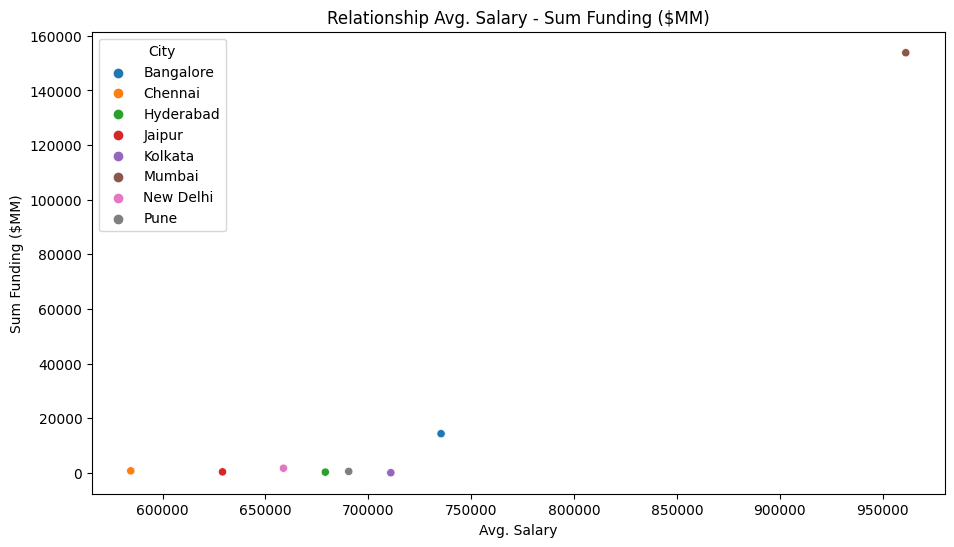

In [17]:
plt.figure(figsize=(11, 6))

sns.scatterplot(data=sps_fnd_loc, x='Avg. Salary', y='Sum Funding ($MM)', hue ='City')

plt.xlabel('Avg. Salary')
plt.ylabel('Sum Funding ($MM)')
plt.title('Relationship Avg. Salary - Sum Funding ($MM)')

plt.show()

**Mumbai** stands out in terms of total funding received by companies and salary paid to their employees.

6. I scraped [this census page](https://www.census2011.co.in/city.php) and created a DataFrame called `cities` containing the first table from that page and I worked in this way:
    1. I showed the City that has the highest levels of `Literacy` in the country.
    2. I merged the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset and I showed which `City` is missing and fixed the problem.
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, I produced a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. I added the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. I showed this city and I gave my interpretation.

In [18]:
from bs4 import BeautifulSoup

url = "https://www.census2011.co.in/city.php"
r = requests.get(url)
content = r.content
soup = BeautifulSoup(content, 'html.parser')
table = soup.find('table')
cities = pd.read_html(str(table))[0]

In [19]:
cities

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...,...
493,494,Gangtok,Sikkim,100286,100286,912,89.33
494,495,Datia,Madhya Pradesh,100284,100284,900,80.56
495,496,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,497,Banswara,Rajasthan,99969,101177,960,85.72


In [20]:
cities = cities.drop('#', axis=1)

In [21]:
cities.dtypes

City             object
State            object
Population        int64
Metropolitan      int64
Sexratio          int64
Literacy        float64
dtype: object

In [22]:
cities.sort_values(['Literacy'], ascending=False)

,City,State,Population,Metropolitan,Sexratio,Literacy
150,Aizawl,Mizoram,293416,293416,1025,98.36
73,Kochi,Kerala,602046,2117990,1027,97.36
137,Thrissur,Kerala,315957,1854783,1075,97.06
102,Kozhikode,Kerala,431560,2030519,1093,96.53
267,Alappuzha,Kerala,174176,241072,1077,96.20
...,...,...,...,...,...,...
439,Khurja,Uttar Pradesh,111062,142636,902,65.61
230,Amroha,Uttar Pradesh,198471,198471,925,62.36
430,Bagaha,Bihar,112634,112634,889,59.84
133,Rampur,Uttar Pradesh,325313,349062,917,59.47


1) **Aizawl** has the higest level of literacy (**98.36**).

In [23]:
sps_fnd_loc_lit = pd.merge(cities, sps_fnd_loc, on='City', how='inner')
sps_fnd_loc_lit

,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Salary,Avg. Rating,Nr. Companies Funded,Sum Funding ($MM)
0,Mumbai,Maharashtra,12442373,18414288,853,89.73,961180.368491,3.881709,200,153830.30
1,Bangalore,Karnataka,8443675,8499399,923,88.71,735344.739593,3.920232,425,14327.42
2,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,679099.157376,3.914484,34,243.96
3,Chennai,Tamil Nadu,4646732,8696010,989,90.18,584559.661513,3.902726,40,717.14
4,Kolkata,West Bengal,4496694,14112536,908,86.31,710925.573034,4.024719,5,28.00
5,Pune,Maharashtra,3124458,5049968,948,89.56,690476.311153,3.886082,46,509.07
6,Jaipur,Rajasthan,3046163,3046163,900,83.33,629135.802469,3.940741,11,343.30


In [24]:
sps_fnd_loc

,City,Avg. Salary,Avg. Rating,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,735344.739593,3.920232,425,14327.42
1,Chennai,584559.661513,3.902726,40,717.14
2,Hyderabad,679099.157376,3.914484,34,243.96
3,Jaipur,629135.802469,3.940741,11,343.30
4,Kolkata,710925.573034,4.024719,5,28.00
5,Mumbai,961180.368491,3.881709,200,153830.30
6,New Delhi,658756.735632,3.943415,143,1673.01
7,Pune,690476.311153,3.886082,46,509.07


2) **New Delhi** is the missing city because on cities df is called only Delhi.

In [25]:
# Fix the problem
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

In [26]:
sps_fnd_loc_lit = pd.merge(cities, sps_fnd_loc, on='City', how='inner')
sps_fnd_loc_lit

,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Salary,Avg. Rating,Nr. Companies Funded,Sum Funding ($MM)
0,Mumbai,Maharashtra,12442373,18414288,853,89.73,961180.368491,3.881709,200,153830.30
1,New Delhi,Delhi,11034555,16314838,876,87.59,658756.735632,3.943415,143,1673.01
2,Bangalore,Karnataka,8443675,8499399,923,88.71,735344.739593,3.920232,425,14327.42
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,679099.157376,3.914484,34,243.96
4,Chennai,Tamil Nadu,4646732,8696010,989,90.18,584559.661513,3.902726,40,717.14
5,Kolkata,West Bengal,4496694,14112536,908,86.31,710925.573034,4.024719,5,28.00
6,Pune,Maharashtra,3124458,5049968,948,89.56,690476.311153,3.886082,46,509.07
7,Jaipur,Rajasthan,3046163,3046163,900,83.33,629135.802469,3.940741,11,343.30


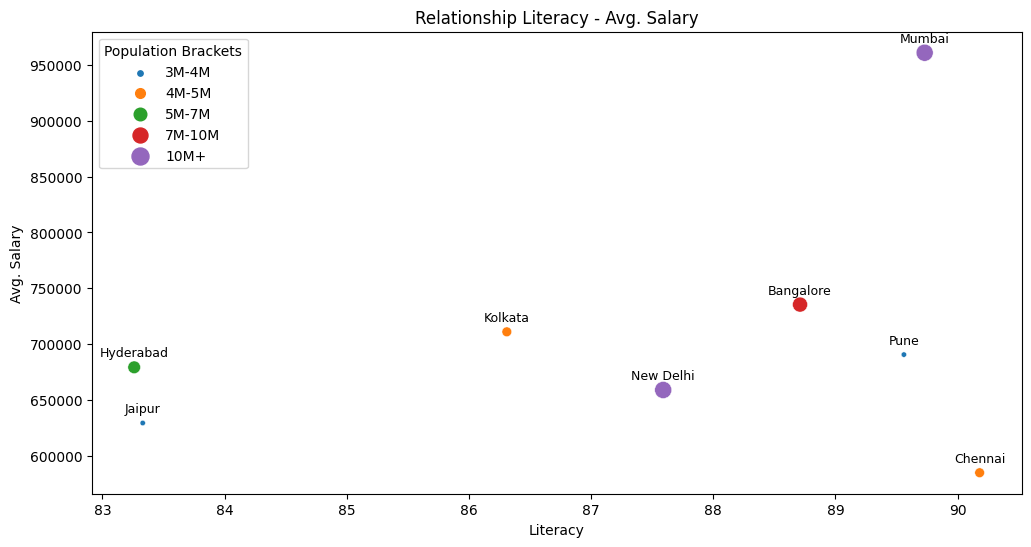

In [58]:
# Create a column named 'Population Brackets' to visualize better the plot with a more accurate legend.

bins = [3000000, 4000000, 5000000, 7000000, 10000000, np.inf]
labels = ['3M-4M', '4M-5M', '5M-7M', '7M-10M', '10M+']
sps_fnd_loc_lit['Population Brackets'] = pd.cut(sps_fnd_loc_lit['Population'], bins=bins, labels=labels)

size_ord = ['10M+', '7M-10M', '5M-7M', '4M-5M', '3M-4M']

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=sps_fnd_loc_lit,
    x='Literacy',
    y='Avg. Salary',
    size='Population Brackets',
    sizes=(15, 150),
    hue = 'Population Brackets',
    size_order=size_ord,
    )

# Add city labels
for i, row in sps_fnd_loc_lit.iterrows():
    plt.annotate(
        row['City'],
        (row['Literacy'], row['Avg. Salary']),
        textcoords="offset points",
        xytext=(0, 7.5),
        ha='center',
        fontsize=9
        )

plt.xlabel('Literacy')
plt.ylabel('Avg. Salary')
plt.title('Relationship Literacy - Avg. Salary')

plt.show()

**Chennai** has a relatively high literacy rate, but a lower average salary compared to other cities with similar literacy levels. Maybe the **cost of living** in Chennai is **lower** in comaparison to other cities with a high literacy rate and this might have an impact on the average salary.

Generally, in regions with a lower cost of living, salaries tend to be adjusted accordingly, which could explain the disparity between the high literacy rate and the lower average salary in Chennai.

(Chennai is a pole of attraction for the western industry to the search of low costs of the job - from Wikipedia).